In [26]:
import os, json

#outputfilename = os.path.join(os.path.split(__file__)[0], "../p7test.json")
outputfilename = "../p7test.json"

print("Loading", outputfilename)
jdata = json.load(open(outputfilename))


Loading ../p7test.json


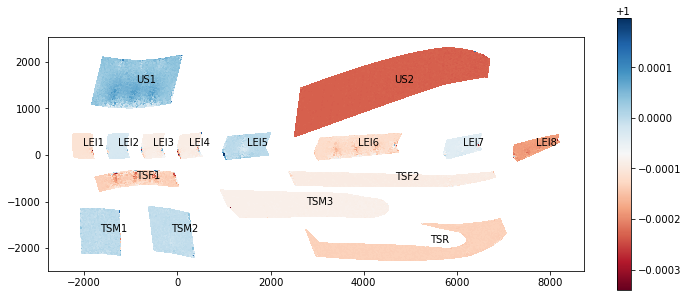

In [27]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import numpy, math

plt.figure(figsize=(12,5))

def P2Cross(a, b):
    return a.u*b.v - b.u*a.v

def TriangArea(p0, p1, p2):
    a = p1 - p0
    b = p2 - p0
    (cx, cy, cz) = (a[1]*b[2] - b[1]*a[2], -a[0]*b[2] + b[0]*a[2], a[0]*b[1] - b[0]*a[1])
    return 0.5*math.sqrt(cx*cx + cy*cy + cz*cz)

for blockname, ffpts, ftris, sfpts, stris in jdata:
    assert ftris == stris
    ffpts = numpy.array(ffpts)
    sfpts = numpy.array(sfpts)
    fareas = numpy.array([ TriangArea(ffpts[tri[0]], ffpts[tri[1]], ffpts[tri[2]])  for tri in ftris ])
    sareas = numpy.array([ TriangArea(sfpts[tri[0]], sfpts[tri[1]], sfpts[tri[2]])  for tri in stris ])

    X = ffpts[:,0]
    Y = ffpts[:,1]

    areachange = fareas/sareas
    plt.tripcolor(X, Y, ftris, facecolors=areachange, cmap='RdBu')

    plt.text(sum(X)/len(X), sum(Y)/len(Y), blockname)

plt.gca().autoscale()
plt.gca().set_aspect("equal")
plt.colorbar()